In [46]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

crops= pd.read_csv("soil_measures.csv")

# create features and target
X= crops.drop("crop",axis=1)
y= crops['crop']

# split into train and test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression model is having difficulty converging within the default number of iterations. 
## Scale the Data
# Instantiate the scaler
scaler= StandardScaler()

# Scale the features
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

# Initialize a dictionary to store scores for feature combinations
scores = {}

# Loop through all possible combinations of features
for feature in ['N','P','K','ph']:
    loreg=LogisticRegression(max_iter=4000)
    loreg.fit(X_train_scaled[:, X.columns.get_loc(feature)].reshape(-1, 1),y_train)
    score= loreg.score(X_test_scaled[:,X.columns.get_loc(feature)].reshape(-1,1), y_test, )
    scores[feature]=score
for name, values in scores.items():
    print(f"{name} : {values}")

best_predict_feature={"K":scores.get("K")}
print(best_predict_feature)

N : 0.1484848484848485
P : 0.16818181818181818
K : 0.2409090909090909
ph : 0.11212121212121212
{'K': 0.2409090909090909}


In [37]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
for feature in ['N', 'P', 'K', 'ph']:
    rf = RandomForestClassifier()
    rf.fit(X_train[[feature]], y_train)
    score = rf.score(X_test[[feature]], y_test)
    scores[feature] = score
    
for name, value in scores.items():
    print(f"{name} : {value}")
    
best_predict_feature['K']=scores['K']

print(best_predict_feature)



N : 0.15454545454545454
P : 0.19696969696969696
K : 0.2833333333333333
ph : 0.12727272727272726
{'K': 0.2833333333333333}


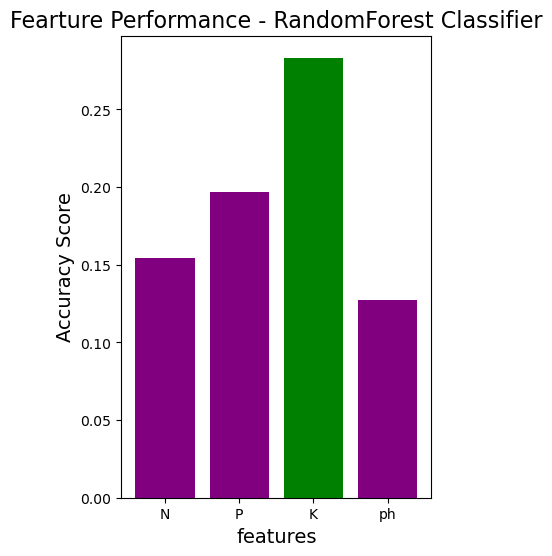

In [38]:
plt.figure(figsize=(4,6))
plt.bar(scores.keys(), scores.values(), color='purple')
plt.title("Fearture Performance - RandomForest Classifier", fontsize=16)
plt.xlabel("features",fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)

plt.bar("K", best_predict_feature['K'], color='green')

plt.show()